# Prediction of Used Car Value

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [3]:
car_df = pd.read_csv('train-data.csv')

In [4]:
car_df.shape

(6019, 14)

In [5]:
car_df.sample(10)

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
5119,5119,Hyundai Santro Xing XP,Kolkata,2008,45500,Petrol,Manual,Second,0.0 kmpl,1086 CC,null bhp,5.0,NaN,1.17
723,723,BMW 3 Series 320d Luxury Plus,Ahmedabad,2015,100000,Diesel,Automatic,First,18.88 kmpl,1995 CC,184 bhp,5.0,NaN,24.75
4010,4010,Maruti A-Star Vxi,Hyderabad,2011,53766,Petrol,Manual,First,19.0 kmpl,998 CC,66.1 bhp,5.0,NaN,2.70
975,975,Ford Endeavour 2.2 Trend AT 4X2,Kochi,2019,11209,Diesel,Automatic,First,12.62 kmpl,2198 CC,158 bhp,7.0,NaN,31.15
799,799,Volkswagen Polo Diesel Comfortline 1.2L,Hyderabad,2011,75020,Diesel,Manual,First,22.07 kmpl,1199 CC,73.9 bhp,5.0,NaN,4.10
5573,5573,Hyundai Creta 1.6 SX Plus Diesel,Kochi,2018,35480,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,13.34
5714,5714,Hyundai i10 Sportz 1.2 AT,Mumbai,2010,57000,Petrol,Automatic,Second,16.95 kmpl,1197 CC,78.9 bhp,5.0,NaN,2.50
1753,1753,Mahindra Verito 1.5 D6 BSIV,Chennai,2011,110000,Diesel,Manual,Second,21.0 kmpl,1461 CC,64.1 bhp,5.0,NaN,2.40
4856,4856,BMW X3 xDrive20d xLine,Kochi,2017,41816,Diesel,Automatic,First,18.56 kmpl,1995 CC,190 bhp,5.0,NaN,32.78
5238,5238,Chevrolet Sail 1.2 LS,Jaipur,2013,48000,Petrol,Manual,First,18.2 kmpl,1199 CC,82.4 bhp,5.0,NaN,3.25


> The "Unnamed:0" column should be dropped as it is the serial no of the observations.

In [6]:
car_df.drop("Unnamed: 0", axis=1, inplace= True)

In [7]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               6019 non-null   object 
 1   Location           6019 non-null   object 
 2   Year               6019 non-null   int64  
 3   Kilometers_Driven  6019 non-null   int64  
 4   Fuel_Type          6019 non-null   object 
 5   Transmission       6019 non-null   object 
 6   Owner_Type         6019 non-null   object 
 7   Mileage            6017 non-null   object 
 8   Engine             5983 non-null   object 
 9   Power              5983 non-null   object 
 10  Seats              5977 non-null   float64
 11  New_Price          824 non-null    object 
 12  Price              6019 non-null   float64
dtypes: float64(2), int64(2), object(9)
memory usage: 611.4+ KB


In [8]:
car_df.nunique()

Name                 1876
Location               11
Year                   22
Kilometers_Driven    3093
Fuel_Type               5
Transmission            2
Owner_Type              4
Mileage               442
Engine                146
Power                 372
Seats                   9
New_Price             540
Price                1373
dtype: int64

## Attributes

* "New_Price" column has many missing values, approximately only 14%  of the observations have New_Price values with 540 unique values.

* A few missing values are observed in "Power", "Seats" and "Engine" attributes.

* "Mileage" , "Engine" and "Power" have units associated making them a object data type. These variables are to be processed in order to convert them to numerical data type. "New_Price" should also be preprossed to convert it to float. 

* The Name varibale has 1876 unique object values which have no order associated with them making them Nominal variables.



# Data Preprocessing

In [9]:
# Extracting the numerical data by removing the units.
car_df['Power'] = car_df['Power'].str.split(' ').str[0]
car_df['Engine'] = car_df['Engine'].str.split(' ').str[0]
car_df['Mileage'] = car_df['Mileage'].str.split(' ').str[0]

In [10]:
# Changing the DataType to Numerical. 

car_df['Mileage'] = car_df['Mileage'].astype('float')
car_df['Power'][car_df.Power == 'null'] = np.nan
car_df.Seats.replace(to_replace = 0.00, value = np.nan, inplace = True )
car_df.Mileage.replace(to_replace = 0.00, value = np.nan, inplace = True )
car_df.Power = car_df.Power.astype('float')
car_df.Engine = car_df.Engine.astype('float')

In [11]:
car_df.sample(10)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
726,Ford EcoSport 1.5 Ti VCT AT Titanium,Kochi,2018,37630,Petrol,Automatic,First,15.63,1499.0,110.40,5.0,NaN,9.10
4865,Honda Amaze S i-Dtech,Kochi,2016,46983,Diesel,Manual,First,25.80,1498.0,98.60,5.0,NaN,5.77
1334,BMW 7 Series 730Ld,Mumbai,2011,55000,Diesel,Automatic,Second,16.46,2993.0,258.00,5.0,NaN,19.50
4099,Hyundai Grand i10 1.2 Kappa Asta,Delhi,2018,10000,Petrol,Manual,First,18.90,1197.0,81.86,5.0,7.54 Lakh,6.50
1410,Ford Ecosport 1.0 Ecoboost Platinum Edition,Mumbai,2017,22000,Petrol,Manual,First,18.88,999.0,123.24,5.0,NaN,7.85
3736,Hyundai Grand i10 Sportz,Kochi,2018,43698,Petrol,Manual,First,18.90,1197.0,82.00,5.0,NaN,5.80
2839,BMW 5 Series 2003-2012 520d,Hyderabad,2009,79000,Diesel,Automatic,First,18.48,1995.0,177.00,5.0,NaN,15.00
2744,Maruti Ritz VDi,Hyderabad,2012,78401,Diesel,Manual,First,23.20,1248.0,73.94,5.0,NaN,3.90
4032,Hyundai Grand i10 CRDi Magna,Delhi,2014,42000,Diesel,Manual,First,24.00,1120.0,70.00,5.0,NaN,3.50
4641,Volkswagen Polo Diesel Highline 1.2L,Kolkata,2010,90110,Diesel,Manual,First,22.07,1199.0,73.90,5.0,NaN,2.50


## Categorical Variables


In [12]:
from sklearn.preprocessing import LabelEncoder

* The "Name" column has 1876 unique car model names, there is no valuble inforamtion. The Company Name however can help in the model building.  

In [13]:
# Extracting the brand name
car_df['Company'] = car_df.Name.str.split(' ').str[0] 
car_df.drop('Name', axis=1, inplace=True)

In [14]:
eda_df = car_df

In [15]:
# Handling the Nominal Categorical Variables.
df = pd.get_dummies(car_df['Fuel_Type'], prefix="Fuel")
car_df = pd.concat([car_df, df], axis= 1).drop('Fuel_Type', axis=1)

In [16]:
# Handling the Ordinal Categorical Variables.
car_df.Owner_Type.replace({'First' : 1, 'Second': 2, 'Third' : 3, 'Fourth & Above': 4 }, inplace =True)
car_df.Transmission.replace({'Manual':0, 'Automatic':1}, inplace = True)

In [17]:
# Label Encoding for "Comapny" and "Location" attributes
le = LabelEncoder()
car_df.Location = le.fit_transform(car_df.Location)
le1 = LabelEncoder()
car_df.Company = le1.fit_transform(car_df.Company)

## Filling NANs

In [18]:
car_df.Seats.fillna(value = 5.00, inplace = True)
car_df.Mileage.fillna(value = car_df.Mileage.median(), inplace = True)
car_df.Power.fillna(value = car_df.Power.median(), inplace = True)
car_df.Engine.fillna(value = car_df.Engine.median(), inplace = True)

In [19]:
car_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Location,6019.0,5.619704,2.955933,0.00,3.0,6.00,8.00,10.00
Year,6019.0,2013.358199,3.269742,1998.00,2011.0,2014.00,2016.00,2019.00
Kilometers_Driven,6019.0,58738.380296,91268.843206,171.00,34000.0,53000.00,73000.00,6500000.00
Transmission,6019.0,0.285762,0.451814,0.00,0.0,0.00,1.00,1.00
Owner_Type,6019.0,1.202858,0.456356,1.00,1.0,1.00,1.00,4.00
Mileage,6019.0,18.340598,4.151148,6.40,15.4,18.20,21.10,33.54
Engine,6019.0,1620.509221,599.635458,72.00,1198.0,1493.00,1969.00,5998.00
Power,6019.0,112.883539,53.283701,34.20,78.0,97.70,138.03,560.00
Seats,6019.0,5.277621,0.803479,2.00,5.0,5.00,5.00,10.00
Price,6019.0,9.479468,11.187917,0.44,3.5,5.64,9.95,160.00


In [20]:
car_df.Kilometers_Driven[car_df.Kilometers_Driven ==6500000.00] = car_df.Kilometers_Driven.mean()

# Univariate Analysis

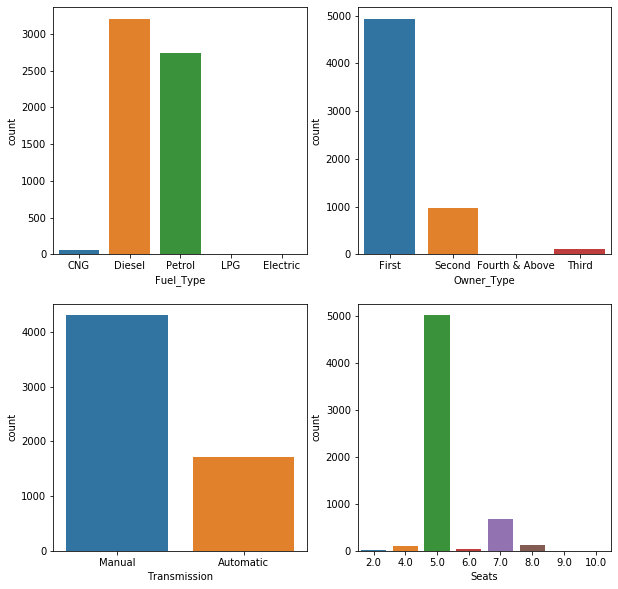

In [21]:
# Categorical Attributes

lis = ['Fuel_Type', 'Owner_Type', 'Transmission', 'Seats']
plt.figure(figsize=(10,10))
for i in range(1,5):
    x=lis[i-1]
    plt.subplot(2,2,i)
    sns.countplot(eda_df[x])

> Univariate Analysis of Categorical Attributes

* Diesel and Petrol are predominant vehicles followed by CNG. Hardly there are any Electric and LPG vehicles for sale.

* Vast Majority of the cars are First Hand. And the count is degrading as the ownership extends.

* Manual Transmission vehicles are more in number but they are significant numner of Automatic Transmission Vehicels as well.

* 5 Seater cars are more prevalent followed by the 7 seaters.  

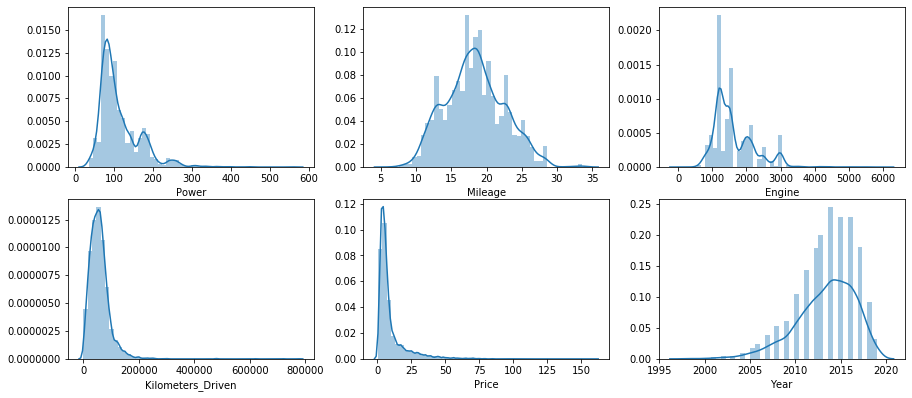

In [22]:
# Distribution of Continous numerical features.

list1 = ['Power', 'Mileage', 'Engine', 'Kilometers_Driven', 'Price', 'Year', ]
plt.figure(figsize=(15,10))
for i in range(1,7):
    x=list1[i-1]
    plt.subplot(3,3,i)
    sns.distplot( car_df[x])

* "Power", "Engine", 'Kilometers_Driven" and "Price" are highly right skewed. Outlier analysis should be done to understand the distribution of these attributes.

* Mileage tends to follow a normal Distribution but Two additional small peaks are present.

* Significant Peaks are evident in "Power" and "Engine" Attributes forming natural clusters.

* "Year" has left skew determing that most of the cars are recent.



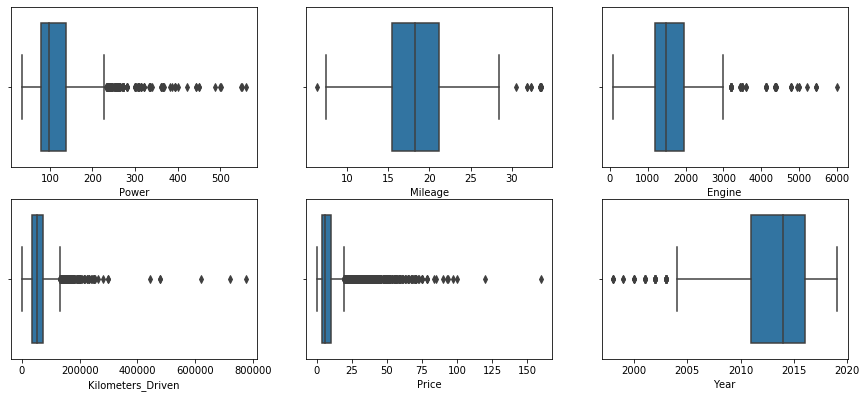

In [23]:
list1 = ['Power', 'Mileage', 'Engine', 'Kilometers_Driven', 'Price','Year']
plt.figure(figsize=(15,10))
for i in range(1,7):
    x=list1[i-1]
    plt.subplot(3,3,i)
    sns.boxplot( car_df[x])

* It is clear that outliers pull the distribution to the right side. The outliers do follow a trend there are no abdrupt arbituary points.

* These outliers have valuable information with them.

* Few Points lie farther from the rest of the data in Kilometers_Driven and Price columns.

## Bivariate Analysis


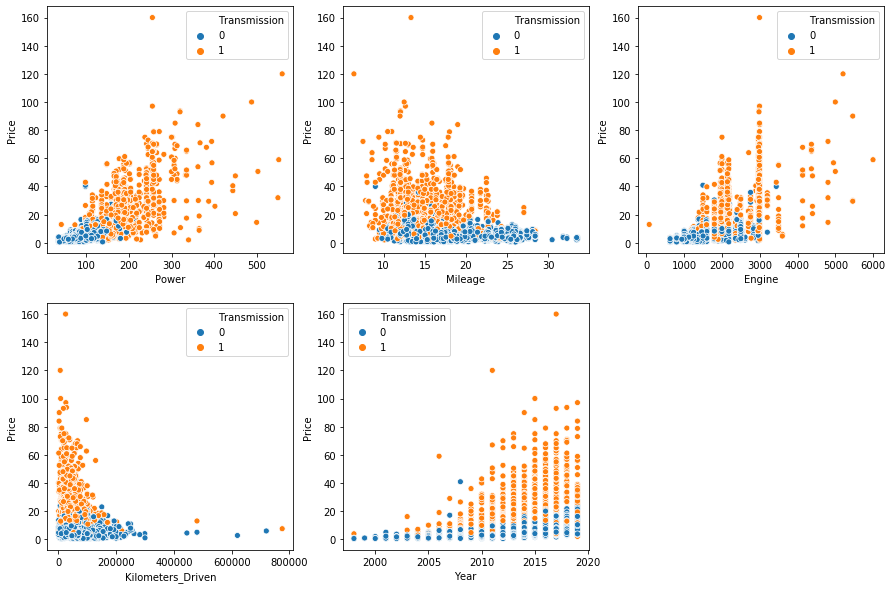

In [24]:
list1 = ['Power', 'Mileage', 'Engine', 'Kilometers_Driven', 'Year' ]
plt.figure(figsize=(15,10))
for i in range(1,6):
    x=list1[i-1]
    plt.subplot(2,3,i)
    sns.scatterplot( car_df[x],car_df.Price, hue = car_df.Transmission)

* All the above subplots show Automatic(0 class) has higher price than the Manual(1) with little few execptions.

* As the Power increases there is a rise in the price, low power vehicles have low price but there is a huge variance at higher price as the price are more scattered widely. High power cars are Automatic Transmission.

* Higher Mileage vehicles have low price and costly cars tend to have low mileage.

* Engine with low capacity have Manual Transmission as engine capacity gets higher Automatic transmission prevails. the general trend increases the price with increase in engine volume.

* Most of the automatic vehicles have driven for less kilometers. The more kilometers the car has been driven the less price it gets. At the lower end there is no significant pattern.

* Older the car less is the price and latest cars are dominantly automatic.


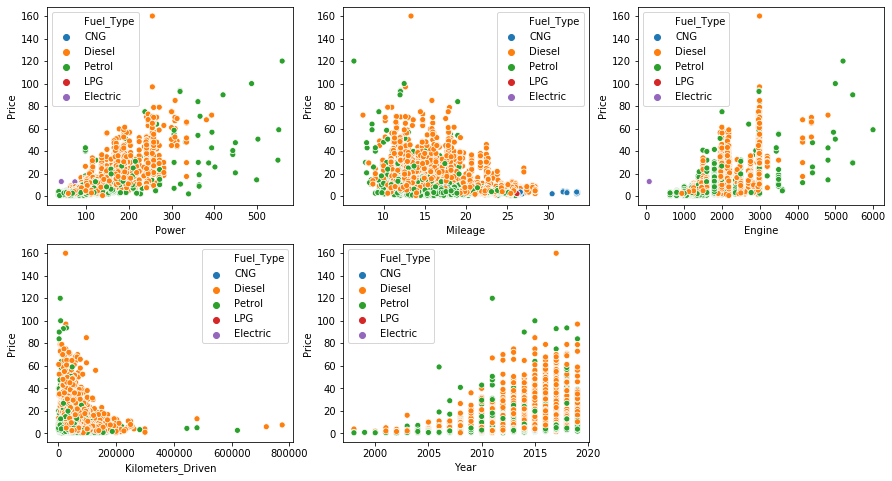

In [25]:
list1 = ['Power', 'Mileage', 'Engine', 'Kilometers_Driven', 'Year' ]
plt.figure(figsize=(15,8))
for i in range(1,6):
    x=list1[i-1]
    plt.subplot(2,3,i)
    sns.scatterplot( car_df[x],car_df.Price, hue = eda_df.Fuel_Type)

* As the power of diesel car increasesthe prices getss higher but that high power petrol cars have diversed prices. Electric (purple) have low power but are costlier than other cars with same power.

* CNG has the highest mileage and they have low price.  

* Electric cars have no engine so it is clearly distinguisged in the engine plot.


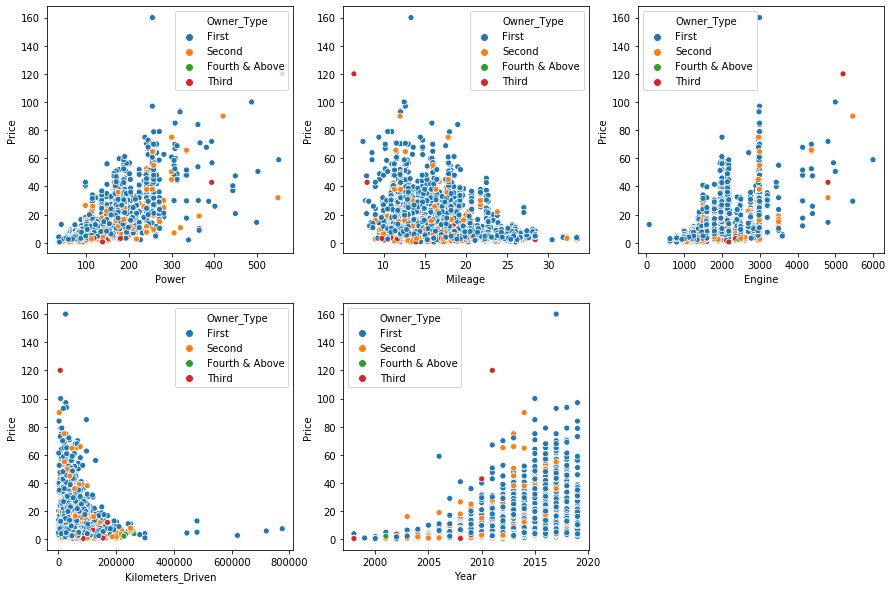

In [26]:
list1 = ['Power', 'Mileage', 'Engine', 'Kilometers_Driven', 'Year' ]
plt.figure(figsize=(15,10))
for i in range(1,6):
    x=list1[i-1]
    plt.subplot(2,3,i)
    sns.scatterplot( car_df[x],car_df.Price, hue = eda_df.Owner_Type)

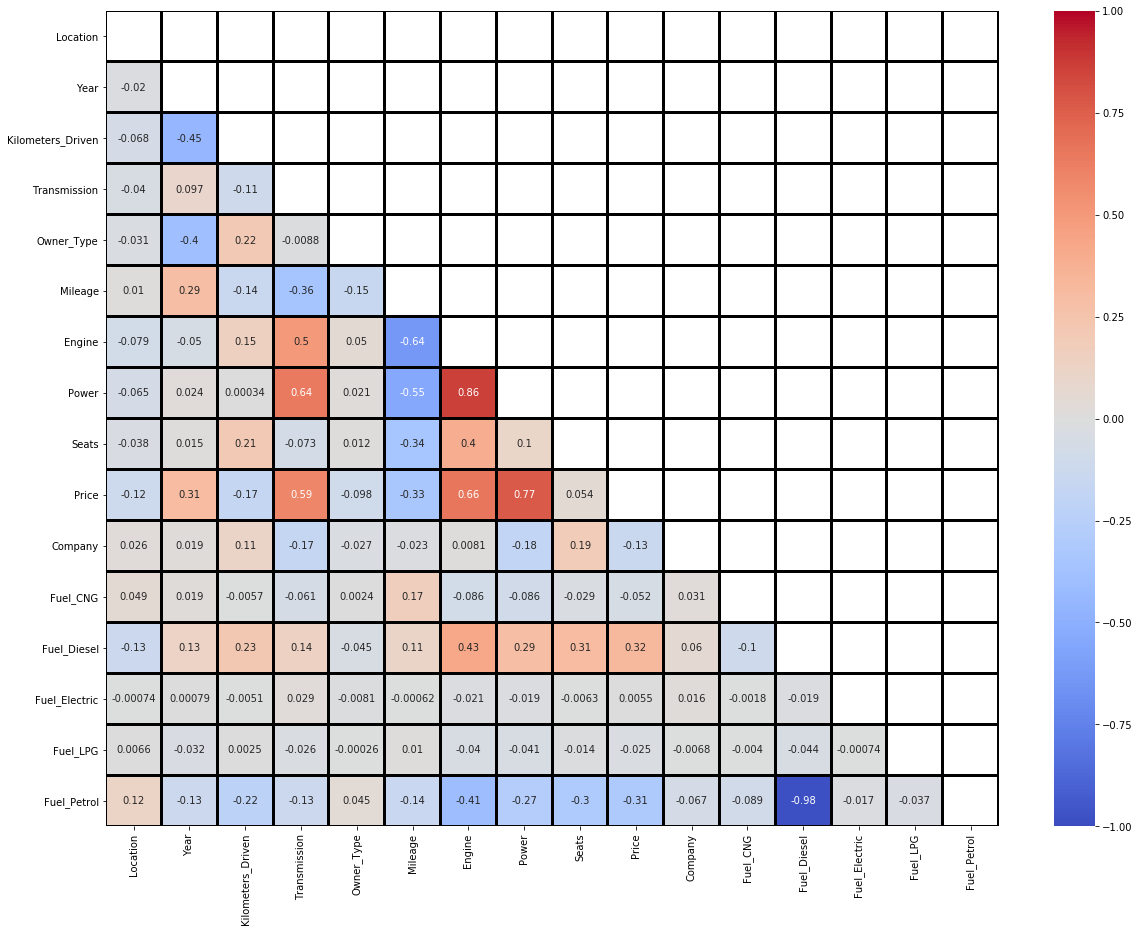

In [27]:
# Correlation Heat-Map

d = car_df.corr()
f, ax = plt.subplots(figsize=(20,15))
mask = np.triu(d)
sns.heatmap(d,mask = mask, cmap='coolwarm', vmin=-1, vmax=1, annot=True, fmt= '.2g', linewidths=2, linecolor='black')
plt.show()

* Price has good correlation with Engine and Power, followed by Transmission and year columns.  Diesel and Petrol also show some kind of relation with the Price.

* Other fule types hardly have correlation with the target variacle price.

* Owner_Type has less effect on price, the reason could be because of domination of First hand. Same is the case with seats.



In [28]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Location           6019 non-null   int32  
 1   Year               6019 non-null   int64  
 2   Kilometers_Driven  6019 non-null   float64
 3   Transmission       6019 non-null   int64  
 4   Owner_Type         6019 non-null   int64  
 5   Mileage            6019 non-null   float64
 6   Engine             6019 non-null   float64
 7   Power              6019 non-null   float64
 8   Seats              6019 non-null   float64
 9   New_Price          824 non-null    object 
 10  Price              6019 non-null   float64
 11  Company            6019 non-null   int32  
 12  Fuel_CNG           6019 non-null   uint8  
 13  Fuel_Diesel        6019 non-null   uint8  
 14  Fuel_Electric      6019 non-null   uint8  
 15  Fuel_LPG           6019 non-null   uint8  
 16  Fuel_Petrol        6019 